# Customer Segmentation Part 1: Preliminary processing and merging data frames

## Topic

Olist is a Brazilian department store platform which operates in the e-commerce segment (Software as Service). The service consists of management of the sales process between shopkeepers and clients, and also includes a customer satisfaction report. The advantages for the shopkeepers is a better market presence and transparent reputation metrics. The driver for the business is to attract more clients and raise the quality of the process. The motivation in this project is to support this effort.

The overall objective of this project is customer segmentation. And since the data provided by Olist contains nine datasets separated by topic, we'll devote this first notebook to importing the datasets, doing the preliminary precessing and merging them together based on the columns they have in common.

The nine datasets used are the following : 

1- Orders : contains info about the order is, status and timestamps of the process of its delivery.

2- Order items: contains orders ids, SKU (Stock Keeping Unit), the seller, price and shipping expense

3- Products : contains technical information about the products (dimensions and weight)

4- Order payments : contains information about payment type, installements and purchase value

5- Order reviews : contains information like review id and score

6- Sellers : contains information about the sellers location like zip code, city and state

7- Customers: gives us information about the customers location: zip code, state and city

8- Geolocation: gives us detailed information about the location of the places where the commerce occured (both customers and sellers)

9- Product category name translation : contains the English translation of some of the products sold on the plateform

## Objective
* Overall Objective:

Be able to cluster clients in groups

* Current Objective:
  - Import the dataframe
  - Make preliminary transformation (imputing, grouping, merging)
  - Producing one dataframe that contains all columns provided.

## Summary
- Importing libraries
- Orders dataset
- Order items dataset
- Products dataset
- Order payments dataset
- Order reviews dataset
- Sellers dataset
- Customers dataset
- Geolocations dataset
- Product category name translation dataset

## Importing libraries

In [1146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
sns.set(rc = {'figure.figsize':(15,8)})

## Orders dataset

In [1050]:
orders_df = pd.read_csv(r'C:\Users\imane\OneDrive\Desktop\Clients_Clustering\olist_orders_dataset.csv', sep =",")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [1051]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


The orders dataset contains information about the orders like the order id, customer id, and status, plus the timestamps of the process of delivery. it contains 8 categorical features.

<AxesSubplot:>

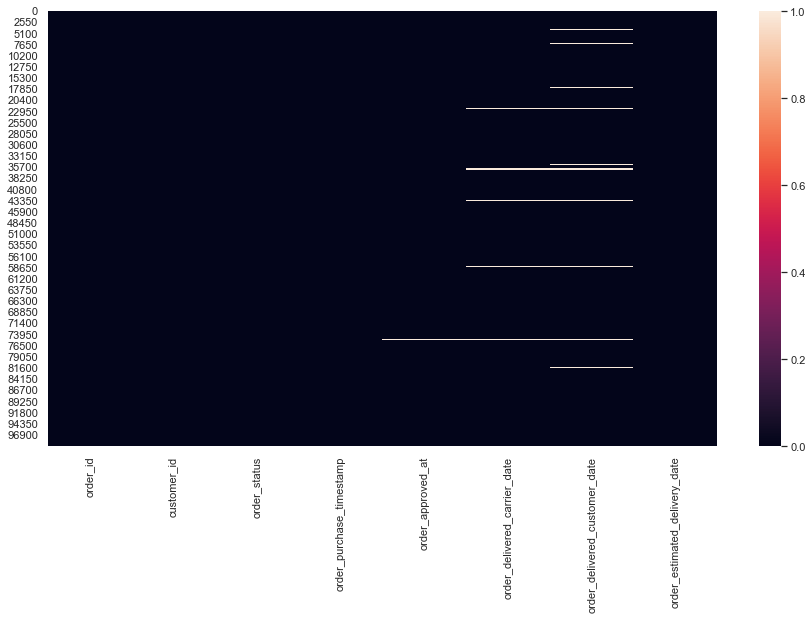

In [1052]:
sns.heatmap(orders_df.isnull())

Missing values are not very importan here, the biggest one is about 3% from the time the order was delivred to the customer.

In [1053]:
orders_df.describe().transpose()

,count,unique,top,freq
order_id,99441,99441,e481f51cbdc54678b7cc49136f2d6af7,1
customer_id,99441,99441,9ef432eb6251297304e76186b10a928d,1
order_status,99441,8,delivered,96478
order_purchase_timestamp,99441,98875,2018-04-11 10:48:14,3
order_approved_at,99281,90733,2018-02-27 04:31:10,9
order_delivered_carrier_date,97658,81018,2018-05-09 15:48:00,47
order_delivered_customer_date,96476,95664,2018-05-08 23:38:46,3
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522


From the table we see that the order id column has 99 441 entries and 99 441 unique values, which means that none of the order ids are repeated. 

### Feature engineering

In [1054]:
orders_df = orders_df.ffill(axis = 1)

I chose to fill out the empty values using pandas ffil, wchich enables you to substitute a missing value with another one. In this case, I prefered to fill them with the value on their left (i.e the date and time at which the previous step of their order was recorded) as opposed to the time of the same step of the previous order in the row. 

In [1055]:
def date_time(df, cols):
    for col in cols:
        df[col] = pd.to_datetime(df[col], format='%Y-%m-%d').dt.date
date_time(orders_df,["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date",
                            "order_delivered_customer_date","order_estimated_delivery_date"])
orders_df.sort_values(by = 'order_purchase_timestamp', inplace = True)

In this part, I converted the dates and time columns into datetime format and dropped the time part, because we might combine sales by days later.Then sorted the dataframe because the time line in this case study is important as it reveals about the developement of the business. 

In [1056]:
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-10-18,2016-10-20
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05,2016-10-07,2016-10-07,2016-10-07,2016-10-28
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13,2016-10-07,2016-10-07,2016-10-07,2016-09-30
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15,2016-09-15,2016-11-07,2016-11-09,2016-10-04
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02,2016-10-06,2016-10-06,2016-10-06,2016-10-25


Now the dataset is sorted from oldest to soonest sales. This will make it possible to see the development in the business over time.

In [1057]:
#orders_df['date_ordinal'] = orders_df['order_purchase_timestamp']\
                           # .apply(lambda date: date.toordinal())

In [1058]:
orders_df['shipping_difference'] = orders_df['order_estimated_delivery_date'] - orders_df['order_delivered_customer_date']
orders_df['shipping_duration'] = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']
orders_df['shipping_est_duration'] = orders_df['order_estimated_delivery_date'] - orders_df['order_purchase_timestamp']

In this part, we added 3 additional columns which seem very much needed for this dataset, they are:
- shipping difference : which is the difference between the estimated and the actual delivery time
- shipping duration : which is the period between the purchase and the final delivery 
- shipping estimated duration: is the period between the purchase and the estimated delivery time

## Order items data set

In [1059]:
items_df = pd.read_csv(r'C:\Users\imane\OneDrive\Desktop\Clients_Clustering\olist_order_items_dataset.csv', sep =",")
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [1060]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [1061]:
items_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
order_item_id,112650.0,1.197834,0.705124,1.00,1.00,1.00,1.00,21.00
price,112650.0,120.653739,183.633928,0.85,39.90,74.99,134.90,6735.00
freight_value,112650.0,19.990320,15.806405,0.00,13.08,16.26,21.15,409.68


The order items data set contains orders ids, SKU (Stock Keeping Unit), the seller, price and shipping expense. All the column sare full and there isn't any missing data. The columns are both numerical (3 cols) and catergorical (4 cols).

### Feature engineering

In [1062]:
def date_time(df, cols):
    for col in cols:
        df[col] = pd.to_datetime(df[col], format='%Y-%m-%d').dt.date
date_time(items_df,["shipping_limit_date"])

In [1063]:
print("Total of unique order ids in order items ds: {} \n\
Total of unique item ids in order items ds: {} \n\
Total of unique order ids in orders ds: {} \n\
Total of records in order items ds: {}"
      .format(
      items_df["order_id"].nunique(),
      items_df["order_item_id"].nunique(),
      orders_df["order_id"].nunique(),
      len(items_df))
)

Total of unique order ids in order items ds: 98666 
Total of unique item ids in order items ds: 21 
Total of unique order ids in orders ds: 99441 
Total of records in order items ds: 112650


In this part we calculated the unique occurence of instances in the following:
- The number of unique order ids in the order items dataset is 98 666 while the total instances in the datset is 112 650, which mean that there are 13 984 instances reflecting additional items in the some of the same orders.
- The number of unique item ids in the order items dataset is 21, also meaning that some orders contained more than one item. And earlier we saw that the max value of this column is 21 items too.

In [1064]:
items_df["order_id"].isin(orders_df["order_id"]).value_counts()

True    112650
Name: order_id, dtype: int64

In [1065]:
orders_df["order_id"].isin(items_df["order_id"]).value_counts()

True     98666
False      775
Name: order_id, dtype: int64

The above code tells us the following:
- 775 orders that are present in the orders data set are not present in the order items data set, an explanation might be that they were orders that got cancelled or never delivered.
- All of the instances present in the items data set (112 650 of them) in the orders dat set, meaning that the 13 984 repeated orders that resulted from the purchase of different items at the same time, don't contain any of the missing 775. 

<AxesSubplot:>

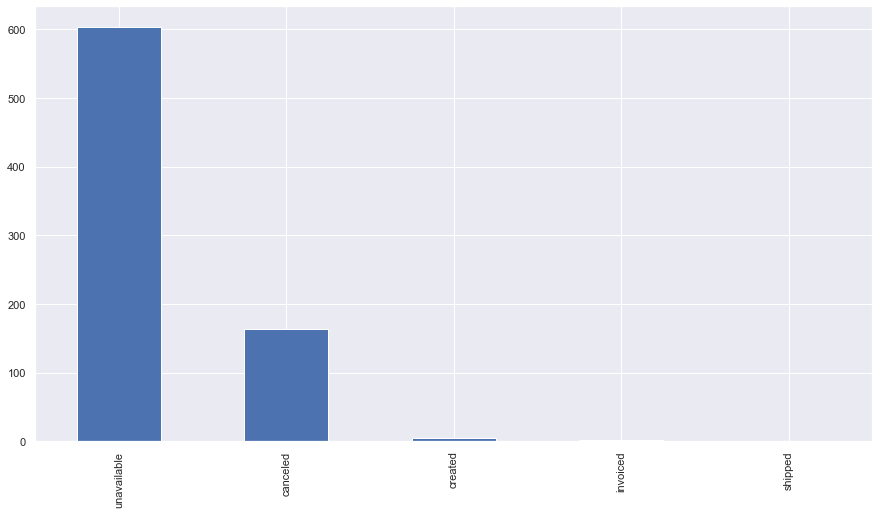

In [1066]:
orders_df[~orders_df['order_id'].isin(items_df['order_id'])]['order_status'].value_counts().plot(kind='bar')

Digging a little deeper we see that most orders that were not present in the order items list were listed either unavailable or cancelled, this explains why they aren"t present in the items ds and will therefore be deleted

In [1067]:
orders_df = orders_df[orders_df["order_id"].isin(items_df["order_id"])]
print(len(orders_df))

98666


In [1068]:
print('Number of duplicated records: {} \n\
Number of duplicated order lines: {}'
    .format(items_df.duplicated().sum(),
    items_df[['order_id', 'product_id']].duplicated().sum()))

Number of duplicated records: 0 
Number of duplicated order lines: 10225


After calculating the sum the duplicate records, we get to the result that none of the records is duplicated (same info in the entire row), but there are 10 225 order ids and product ids that were results of repeating

In [1069]:
grouped_df = items_df.groupby(by=["product_id","order_id"], as_index= False).agg({
        'order_item_id': 'count', 
        'seller_id': 'first',
        'shipping_limit_date': 'first',
        'price': 'first',
        'freight_value': 'first'
        })
grouped_df.head()

,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,00066f42aeeb9f3007548bb9d3f33c38,f30149f4a8882a08895b6a242aa0d612,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24,101.65,18.59
1,00088930e925c41fd95ebfe695fd2655,f5eda0ded77c1293b04c953138c8331d,1,7142540dd4c91e2237acb7e911c4eba2,2017-12-18,129.90,13.93
2,0009406fd7479715e4bef61dd91f2462,0bf736fd0fd5169d60de3699fcbcf986,1,4a3ca9315b744ce9f8e9374361493884,2017-12-29,229.00,13.10
3,000b8f95fcb9e0096488278317764d19,3aba44d8e554ab4bb8c09f6f78032ca8,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16,58.90,19.60
4,000b8f95fcb9e0096488278317764d19,6f0dfb5b5398b271cc6bbd9ee263530e,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07,58.90,19.60


In [1070]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102425 entries, 0 to 102424
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   product_id           102425 non-null  object 
 1   order_id             102425 non-null  object 
 2   order_item_id        102425 non-null  int64  
 3   seller_id            102425 non-null  object 
 4   shipping_limit_date  102425 non-null  object 
 5   price                102425 non-null  float64
 6   freight_value        102425 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.5+ MB


The new data set grouped_df represents the order items dataset after grouping it by product id and aggregating the first row for all column except that of order_item_id (which is the amount of articles) which represents the sum of all articles ordered at the same time.

In [1071]:
print('Unique order ids in new table: {} \n\
Unique order ids in old table: {} \n\
Unique product ids in new table: {} \n\
Unique product ids in old table: {} \n\
Total quantity in new table: {} \n\
Total quantity in old table: {}'
    .format(
    len(grouped_df['order_id'].unique()),
    len(items_df['order_id'].unique()),
    len(grouped_df['product_id'].unique()),
    len(items_df['product_id'].unique()),
    grouped_df['order_item_id'].sum(),
    len(items_df)
    ))

Unique order ids in new table: 98666 
Unique order ids in old table: 98666 
Unique product ids in new table: 32951 
Unique product ids in old table: 32951 
Total quantity in new table: 112650 
Total quantity in old table: 112650


Here we were just checking that there was no data loss during the transformations, everything seems great. We'll rename the column order item id 

In [1072]:
grouped_df.rename(columns = {'order_item_id': 'quantity'}, inplace = True)
grouped_df["quantity"].value_counts()

1     95337
2      5382
3       953
4       390
6       172
5       168
10        5
7         4
12        2
9         2
15        2
14        2
8         2
20        2
11        1
13        1
Name: quantity, dtype: int64

This shows us how many orders were processed containing different quantities of articles

In [1073]:
grouped_df["quantity"].mean()

1.0998291432755676

The mean of the column also seems logical for an ecommerce distribution business

## Merging the orders and order items data sets

In [1074]:
orders_items = orders_df.merge(grouped_df, on= "order_id")
orders_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_difference,shipping_duration,shipping_est_duration,product_id,quantity,seller_id,shipping_limit_date,price,freight_value
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-10-18,2016-10-20,2 days,44 days,46 days,c1488892604e4ba5cff5b4eb4d595400,1,1554a68530182680ad5c8b042c3ab563,2016-10-26,39.99,31.67
1,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-10-18,2016-10-20,2 days,44 days,46 days,f293394c72c9b5fafd7023301fc21fc2,1,1554a68530182680ad5c8b042c3ab563,2016-10-26,32.90,31.67
2,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05,2016-10-07,2016-10-07,2016-10-07,2016-10-28,21 days,32 days,53 days,f3c2d01a84c947b078e32bbef0718962,1,a425f92c199eb576938df686728acd20,2016-09-19,59.50,15.56
3,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15,2016-09-15,2016-11-07,2016-11-09,2016-10-04,-36 days,55 days,19 days,5a6b04657a4c5ee34285d1e4619a96b4,3,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19,44.99,2.83
4,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02,2016-10-06,2016-10-06,2016-10-06,2016-10-25,19 days,4 days,23 days,d2998d7ced12f83f9b832f33cf6507b6,1,25e6ffe976bd75618accfe16cefcbd0d,2016-10-21,100.00,9.34


In [1075]:
orders_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102425 entries, 0 to 102424
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       102425 non-null  object         
 1   customer_id                    102425 non-null  object         
 2   order_status                   102425 non-null  object         
 3   order_purchase_timestamp       102425 non-null  object         
 4   order_approved_at              102425 non-null  object         
 5   order_delivered_carrier_date   102425 non-null  object         
 6   order_delivered_customer_date  102425 non-null  object         
 7   order_estimated_delivery_date  102425 non-null  object         
 8   shipping_difference            102425 non-null  timedelta64[ns]
 9   shipping_duration              102425 non-null  timedelta64[ns]
 10  shipping_est_duration          102425 non-null  timedelt

The new data set seems great, it contains both tables from before merged by order id. All the columns are full (there aren't any missing values) and they differ from numerical to categorical and time delta types.

## Products data set

In [1076]:
products_df = pd.read_csv(r'C:\Users\imane\OneDrive\Desktop\Clients_Clustering\olist_products_dataset.csv', sep =",")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


The products table contains technical information about the products (dimensions and weight) 

In [1077]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [1078]:
products_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
product_name_lenght,32341.0,48.476949,10.245741,5.0,42.0,51.0,57.0,76.0
product_description_lenght,32341.0,771.495285,635.115225,4.0,339.0,595.0,972.0,3992.0
product_photos_qty,32341.0,2.188986,1.736766,1.0,1.0,1.0,3.0,20.0
product_weight_g,32949.0,2276.472488,4282.038731,0.0,300.0,700.0,1900.0,40425.0
product_length_cm,32949.0,30.815078,16.914458,7.0,18.0,25.0,38.0,105.0
product_height_cm,32949.0,16.937661,13.637554,2.0,8.0,13.0,21.0,105.0
product_width_cm,32949.0,23.196728,12.079047,6.0,15.0,20.0,30.0,118.0


In [1079]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [1080]:
products_df['product_id'].duplicated().sum()

0

The products data set contains nine columns representing both numerical and categorical features. It contains some missing values but none of the rows is duplicated.

In [1081]:
print('Product ids count in order items table: {} \n\
Product ids count in products table: {}'
    .format(
    len(orders_items['product_id'].unique()),
    len(products_df['product_id'].unique())
    ))
products_df['product_id'].equals(orders_items['product_id'])

Product ids count in order items table: 32951 
Product ids count in products table: 32951


False

We see that the unique count of product ids is the same in both datasets. However, the preducts ids in both datasets don't match. We'll see this in detail after merging the two dfs 

## Merging the orders items dataset with the products dataset

In [1082]:
orders_items_products = orders_items.merge(products_df, on="product_id")
orders_items_products.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_difference,shipping_duration,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-10-18,2016-10-20,2 days,44 days,...,39.99,31.67,moveis_decoracao,59.0,426.0,2.0,1400.0,32.0,6.0,28.0
1,35d3a51724a47ef1d0b89911e39cc4ff,27ab53f26192510ff85872aeb3759dcc,delivered,2016-10-04,2016-10-05,2016-10-14,2016-10-26,2016-12-20,55 days,22 days,...,39.99,22.34,moveis_decoracao,59.0,426.0,2.0,1400.0,32.0,6.0,28.0
2,c4f710df20f7d1500da1aef81a993f65,4b671f05b6eb9dc1d2c1bae9c8c78536,delivered,2016-10-10,2016-10-10,2016-10-18,2016-10-26,2016-12-14,49 days,16 days,...,39.99,11.80,moveis_decoracao,59.0,426.0,2.0,1400.0,32.0,6.0,28.0
3,81e5043198a44ddeb226002ff55d8ad4,ddd15ef77c83eea8c534d2896173a927,delivered,2017-01-09,2017-01-09,2017-01-09,2017-02-24,2017-02-24,0 days,46 days,...,38.50,15.56,moveis_decoracao,59.0,426.0,2.0,1400.0,32.0,6.0,28.0
4,03b218d39c422c250f389120c531b61f,db857a86c685a6a3a02a705961ec1ff1,delivered,2017-01-14,2017-01-14,2017-01-16,2017-01-18,2017-03-01,42 days,4 days,...,38.50,11.74,moveis_decoracao,59.0,426.0,2.0,1400.0,32.0,6.0,28.0


In [1083]:
orders_items_products.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
shipping_difference                 0
shipping_duration                   0
shipping_est_duration               0
product_id                          0
quantity                            0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1460
product_name_lenght              1460
product_description_lenght       1460
product_photos_qty               1460
product_weight_g                   16
product_length_cm                  16
product_height_cm                  16
product_width_cm                   16
dtype: int64

After the merge, we see that the number of missing values increased from 610 to 1460 for certain columns and from 2 to 16 for others. The reason is the product ids that didn't match between the two datasets, so they were added to the dataframe but there is no info about their dimensions there.

In [1084]:
def subst_mean(dat, cols):
    for col in cols:
        dat[col] = dat[col].fillna(dat[col].mean())

In [1085]:
subst_mean(orders_items_products, [
    'product_length_cm',
    'product_weight_g',
    'product_height_cm',
    'product_width_cm'
    ])

Here we substituted the missing values of the dimension features by the mean of the column.

In [1086]:
cols = ["product_category_name","product_name_lenght","product_description_lenght",
                           "product_photos_qty"]
orders_items_products[cols] = orders_items_products[cols].fillna(orders_items_products.mode().iloc[0])

Here we substituted the missing values of product name, description and photo quantity with the most frequent value in the column

In [1087]:
orders_items_products["volume_ltr"]\
= orders_items_products["product_length_cm"]\
*orders_items_products["product_height_cm"]\
*orders_items_products["product_width_cm"]\
*orders_items_products["quantity"]

Here we added an additional column of volume in liters, with is the height*weight*lenght than multiplied by the quantity to get the volume of the totality of the  products. 

## The order payments dataset

In [1088]:
payments_df = pd.read_csv(r'C:\Users\imane\OneDrive\Desktop\Clients_Clustering\olist_order_payments_dataset.csv', sep =",")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [1089]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [1090]:
payments_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
payment_sequential,103886.0,1.092679,0.706584,1.0,1.00,1.0,1.0000,29.00
payment_installments,103886.0,2.853349,2.687051,0.0,1.00,1.0,4.0000,24.00
payment_value,103886.0,154.100380,217.494064,0.0,56.79,100.0,171.8375,13664.08


In [1091]:
payments_df["order_id"].duplicated().sum()

4446

The order payments dataset contains information about payment type, installements and purchase value. It contains both numerical and categorical features. The payment sequentital features has min, 25%, 50% and 75% all representing values of 1, and there are 4446 duplicated values. An explanation could be that some orders were payed at different sequences so we're going to group the data frame by order id.

In [1092]:
payments_df = payments_df.groupby(by=["order_id"]).agg({
        'payment_sequential': 'sum', 
        'payment_type': 'first',
        'payment_installments': 'sum',
        'payment_value': 'sum'
        })
payments_df = payments_df.reset_index()

In [1093]:
payments_df["order_id"].duplicated().sum()

0

Now, we've grouped the dataset by order id, sumed up the other features and kept only the first for payment type. So, we've got 0 duplicates now.

In [1094]:
orders_items_products["order_id"].isin(payments_df["order_id"]).value_counts()

True     102424
False         1
Name: order_id, dtype: int64

## Merging the merged dataset with the payments dataset

In [1095]:
or_it_pr_pa = orders_items_products.merge(payments_df, on= "order_id")
or_it_pr_pa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102424 entries, 0 to 102423
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       102424 non-null  object         
 1   customer_id                    102424 non-null  object         
 2   order_status                   102424 non-null  object         
 3   order_purchase_timestamp       102424 non-null  object         
 4   order_approved_at              102424 non-null  object         
 5   order_delivered_carrier_date   102424 non-null  object         
 6   order_delivered_customer_date  102424 non-null  object         
 7   order_estimated_delivery_date  102424 non-null  object         
 8   shipping_difference            102424 non-null  timedelta64[ns]
 9   shipping_duration              102424 non-null  timedelta64[ns]
 10  shipping_est_duration          102424 non-null  timedelt

Then we checked how many order ids are present in the consilidated data frame from before, actually exist in the oayments dataset. All of them were present excpet one, so after merging the new datasets we now have 30 columns with 102424 rows.

## Order reviews dataset

In [1096]:
reviews_df = pd.read_csv(r'C:\Users\imane\OneDrive\Desktop\Clients_Clustering\olist_order_reviews_dataset.csv', sep =",")
reviews_df.tail()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99223,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49


In [1097]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [1098]:
reviews_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
review_score,99224.0,4.086421,1.347579,1.0,4.0,5.0,5.0,5.0


The product reviews dataset contains information like review id and score, message and time. It contains 7 columns most of which are categorical, with one numerical feature. This latter has a 25% of 4 and all 50%, 75% and max valued at 5, which means that the products sold by olist get good scores more often than not. 

<AxesSubplot:>

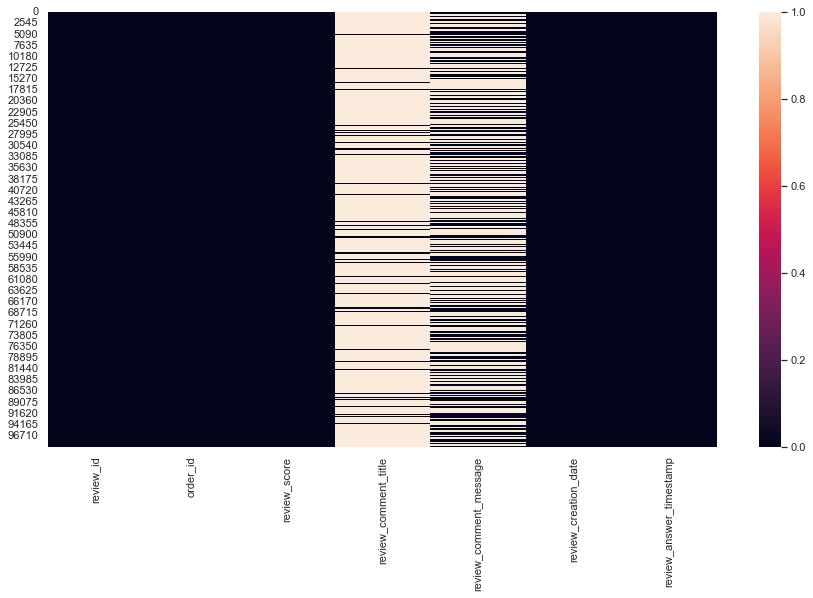

In [1099]:
sns.heatmap(reviews_df.isnull())

The columns of review comment title and review comment message have a lot of missing data (more missing than present). They shall therefore be deleted.

In [1100]:
reviews_df = reviews_df.drop(["review_comment_title","review_comment_message"], axis = 1)

In [1101]:
reviews_df["order_id"].duplicated().sum()

551

We have some duplicates among the order ids, meaning that some people left more than one comment for a certain product. We'll group the dataframe by order id once again, then aggregate the first occurence for review id, creation and answer date. And will take the max value for the review score.

In [1102]:
reviews_df = reviews_df.groupby(by=["order_id"]).agg({
        'review_id': 'first', 
        'review_score': 'max',
        'review_creation_date': 'first',
        'review_answer_timestamp': 'first'
        })
reviews_df = reviews_df.reset_index()
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98673 entries, 0 to 98672
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   order_id                 98673 non-null  object
 1   review_id                98673 non-null  object
 2   review_score             98673 non-null  int64 
 3   review_creation_date     98673 non-null  object
 4   review_answer_timestamp  98673 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


After grouping the data by order id and applying the mentioned changes, we got rid of the 551 additional rows.

### Feature engineering

In [1103]:
def date_time(df, cols):
    for col in cols:
        df[col] = pd.to_datetime(df[col], format='%Y-%m-%d').dt.date
date_time(reviews_df,["review_creation_date","review_answer_timestamp"])
reviews_df.sort_values(by = 'review_creation_date', inplace = True)

Then, we got rid of the time stamp in review creation and answer dates

In [1104]:
reviews_df["difference_reviews"] = reviews_df["review_answer_timestamp"] - reviews_df["review_creation_date"]
reviews_df.head()

,order_id,review_id,review_score,review_creation_date,review_answer_timestamp,difference_reviews
49483,809a282bbd5dbcabb6f2f724fca862ec,69ac6a27fde9855ebeaaecac0f78058b,1,2016-10-02,2016-10-26,24 days
73875,bfbd0f9bdef84302105ad712db648a6c,6916ca4502d6d3bfd39818759d55d536,1,2016-10-06,2016-10-07,1 days
88475,e5215415bb6f76fe3b7cb68103a0d1c0,49f695dffa457eaba90d388a5c37e942,1,2016-10-09,2016-10-11,2 days
87308,e2144124f98f3bf46939bc5183104041,743d98b1a4782f0646898fc915ef002a,4,2016-10-15,2016-10-16,1 days
59216,9aa3197e4887919fde0307fc23601d7a,b2d5d8db2a841d27a72e4c06c6212368,4,2016-10-15,2016-10-17,2 days


Then, we created a new column to keep track of the difference of time between the day the review was written and the day it was answered.

In [1105]:
reviews_df["order_id"].duplicated().sum()

0

In [1106]:
or_it_pr_pa["order_id"].isin(reviews_df["order_id"]).value_counts()

True     101627
False       797
Name: order_id, dtype: int64

## Merging the reviews dataset with the merged datset

Apparently there are no duplicated values in the dataframe. Great, now we'll move to merging it with the previous one. 

In [1107]:
or_it_pr_pa_re = or_it_pr_pa.merge(reviews_df, on= "order_id")
or_it_pr_pa_re.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_difference,shipping_duration,...,volume_ltr,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,difference_reviews
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-10-18,2016-10-20,2 days,44 days,...,5376.0,1,credit_card,1,136.23,cef1ee03ded4d6272894a2eead6e1328,1,2016-10-22,2016-11-15,24 days
1,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-10-18,2016-10-20,2 days,44 days,...,5376.0,1,credit_card,1,136.23,cef1ee03ded4d6272894a2eead6e1328,1,2016-10-22,2016-11-15,24 days
2,35d3a51724a47ef1d0b89911e39cc4ff,27ab53f26192510ff85872aeb3759dcc,delivered,2016-10-04,2016-10-05,2016-10-14,2016-10-26,2016-12-20,55 days,22 days,...,5376.0,1,boleto,1,62.33,56a697a6c18ae87216ae4db18b32577b,5,2016-10-27,2016-10-28,1 days
3,c4f710df20f7d1500da1aef81a993f65,4b671f05b6eb9dc1d2c1bae9c8c78536,delivered,2016-10-10,2016-10-10,2016-10-18,2016-10-26,2016-12-14,49 days,16 days,...,5376.0,1,credit_card,5,51.79,f24e1946d658c13928818f1a73b6d899,5,2016-10-27,2016-10-28,1 days
4,81e5043198a44ddeb226002ff55d8ad4,ddd15ef77c83eea8c534d2896173a927,delivered,2017-01-09,2017-01-09,2017-01-09,2017-02-24,2017-02-24,0 days,46 days,...,10752.0,1,credit_card,10,108.12,aba16ccba4d09a4250f9c4877011f984,1,2017-02-22,2017-02-22,0 days


In [1108]:
or_it_pr_pa_re.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101627 entries, 0 to 101626
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       101627 non-null  object         
 1   customer_id                    101627 non-null  object         
 2   order_status                   101627 non-null  object         
 3   order_purchase_timestamp       101627 non-null  object         
 4   order_approved_at              101627 non-null  object         
 5   order_delivered_carrier_date   101627 non-null  object         
 6   order_delivered_customer_date  101627 non-null  object         
 7   order_estimated_delivery_date  101627 non-null  object         
 8   shipping_difference            101627 non-null  timedelta64[ns]
 9   shipping_duration              101627 non-null  timedelta64[ns]
 10  shipping_est_duration          101627 non-null  timedelt

After merging the reviews ds with the consolidated dataset we get 35 columns and only 101 627 instances, because 797 instances were removed during the merge because their order id weren't present  in the reviews ds.

## The Sellers dataset

In [1109]:
seller_df = pd.read_csv(r'C:\Users\imane\OneDrive\Desktop\Clients_Clustering\olist_sellers_dataset.csv', sep =",")
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [1110]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [1111]:
seller_df["seller_id"].duplicated().sum()

0

In [1112]:
or_it_pr_pa_re["seller_id"].isin(seller_df["seller_id"]).value_counts()

True    101627
Name: seller_id, dtype: int64

The seller dataset contains information about the sellers location like zip code, city and state. It has only 4 columns only one of which is numerical and the others are categorical. There are no duplicates and no empty values in the ds and all the seller ids present in the consolidated dataset from before are present in this one. So, we'll just go ahead and merge them.

## Merging the consolidated dataset with the sellers dataset

In [1113]:
or_it_pr_pa_re_se = or_it_pr_pa_re.merge(seller_df, on= "seller_id")
or_it_pr_pa_re_se.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_difference,shipping_duration,...,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,difference_reviews,seller_zip_code_prefix,seller_city,seller_state
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-10-18,2016-10-20,2 days,44 days,...,1,136.23,cef1ee03ded4d6272894a2eead6e1328,1,2016-10-22,2016-11-15,24 days,37580,monte siao,MG
1,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-10-18,2016-10-20,2 days,44 days,...,1,136.23,cef1ee03ded4d6272894a2eead6e1328,1,2016-10-22,2016-11-15,24 days,37580,monte siao,MG
2,35d3a51724a47ef1d0b89911e39cc4ff,27ab53f26192510ff85872aeb3759dcc,delivered,2016-10-04,2016-10-05,2016-10-14,2016-10-26,2016-12-20,55 days,22 days,...,1,62.33,56a697a6c18ae87216ae4db18b32577b,5,2016-10-27,2016-10-28,1 days,37580,monte siao,MG
3,c4f710df20f7d1500da1aef81a993f65,4b671f05b6eb9dc1d2c1bae9c8c78536,delivered,2016-10-10,2016-10-10,2016-10-18,2016-10-26,2016-12-14,49 days,16 days,...,5,51.79,f24e1946d658c13928818f1a73b6d899,5,2016-10-27,2016-10-28,1 days,37580,monte siao,MG
4,81e5043198a44ddeb226002ff55d8ad4,ddd15ef77c83eea8c534d2896173a927,delivered,2017-01-09,2017-01-09,2017-01-09,2017-02-24,2017-02-24,0 days,46 days,...,10,108.12,aba16ccba4d09a4250f9c4877011f984,1,2017-02-22,2017-02-22,0 days,37580,monte siao,MG


In [1114]:
or_it_pr_pa_re_se.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101627 entries, 0 to 101626
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       101627 non-null  object         
 1   customer_id                    101627 non-null  object         
 2   order_status                   101627 non-null  object         
 3   order_purchase_timestamp       101627 non-null  object         
 4   order_approved_at              101627 non-null  object         
 5   order_delivered_carrier_date   101627 non-null  object         
 6   order_delivered_customer_date  101627 non-null  object         
 7   order_estimated_delivery_date  101627 non-null  object         
 8   shipping_difference            101627 non-null  timedelta64[ns]
 9   shipping_duration              101627 non-null  timedelta64[ns]
 10  shipping_est_duration          101627 non-null  timedelt

After merging the two datasets, we get a dataframe with 38 columns and the same number of instances as  before. None of the column scontains empty values.

## The customers dataset 

In [1115]:
customers_df =  pd.read_csv(r'C:\Users\imane\OneDrive\Desktop\Clients_Clustering\olist_customers_dataset.csv', sep =",")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [1116]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [1117]:
customers_df["customer_id"].duplicated().sum()

0

In [1118]:
customers_df["customer_unique_id"].duplicated().sum()

3345

The customers dataset gives us information about the customers location: zip code, state and city. It also contains 2 kinds of customer ids: one is present in the consolidated datset and the other (customer unique id) is not.
We see that there are no duplicates in the column customer id and 3345 duplicates in customer unique id, which means that the customer id doesn't represent one unique client, and one unique customer id can have more than one customer id. Therefore, we'll group the dataset by customer unique id to get rid of duplicates.

In [1119]:
customers_df = customers_df.groupby(by=["customer_unique_id"]).agg({
        'customer_id': 'first', 
        'customer_zip_code_prefix': 'first',
        'customer_city': 'first',
        'customer_state': 'first'
        })
customers_df = customers_df.reset_index()
customers_df["customer_unique_id"].duplicated().sum()

0

In [1120]:
len(customers_df)

96096

Now we've grouped the dataframe by order unique id, and aggregated the first value for all the columns. The result is 0 duplicates in the order unique id, the number of instances is down to 96 096.

In [1121]:
or_it_pr_pa_re_se["customer_id"].isin(customers_df["customer_id"]).value_counts()

True     98130
False     3497
Name: customer_id, dtype: int64

We see here that only 98 130 of customers are registered in the customers dataset, meaning that 3 497 clients were not kept track of. The next move is to joing it to the consolidated data set.

## Merging the customers dataset to the consolidated dataset

In [1122]:
or_it_pr_pa_re_se_cu = or_it_pr_pa_re_se.merge(customers_df, on= "customer_id")
or_it_pr_pa_re_se_cu.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_difference,shipping_duration,...,review_creation_date,review_answer_timestamp,difference_reviews,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-10-18,2016-10-20,2 days,44 days,...,2016-10-22,2016-11-15,24 days,37580,monte siao,MG,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR
1,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-10-18,2016-10-20,2 days,44 days,...,2016-10-22,2016-11-15,24 days,37580,monte siao,MG,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR
2,35d3a51724a47ef1d0b89911e39cc4ff,27ab53f26192510ff85872aeb3759dcc,delivered,2016-10-04,2016-10-05,2016-10-14,2016-10-26,2016-12-20,55 days,22 days,...,2016-10-27,2016-10-28,1 days,37580,monte siao,MG,f922896769e9517ea3c630f3c8de86d0,96832,santa cruz do sul,RS
3,c4f710df20f7d1500da1aef81a993f65,4b671f05b6eb9dc1d2c1bae9c8c78536,delivered,2016-10-10,2016-10-10,2016-10-18,2016-10-26,2016-12-14,49 days,16 days,...,2016-10-27,2016-10-28,1 days,37580,monte siao,MG,0ecf7f65b5ff3b9e61b637e59f495e0a,30411,belo horizonte,MG
4,81e5043198a44ddeb226002ff55d8ad4,ddd15ef77c83eea8c534d2896173a927,delivered,2017-01-09,2017-01-09,2017-01-09,2017-02-24,2017-02-24,0 days,46 days,...,2017-02-22,2017-02-22,0 days,37580,monte siao,MG,853ba75a0b423722ccf270eea3b4cfe4,21843,rio de janeiro,RJ


In [1123]:
or_it_pr_pa_re_se_cu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98130 entries, 0 to 98129
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       98130 non-null  object         
 1   customer_id                    98130 non-null  object         
 2   order_status                   98130 non-null  object         
 3   order_purchase_timestamp       98130 non-null  object         
 4   order_approved_at              98130 non-null  object         
 5   order_delivered_carrier_date   98130 non-null  object         
 6   order_delivered_customer_date  98130 non-null  object         
 7   order_estimated_delivery_date  98130 non-null  object         
 8   shipping_difference            98130 non-null  timedelta64[ns]
 9   shipping_duration              98130 non-null  timedelta64[ns]
 10  shipping_est_duration          98130 non-null  timedelta64[ns]
 11  pr

After the merge, we get a 42 column dataframe with 98 130 instances.

## The geolocation dataset

In [1124]:
locations_df =  pd.read_csv(r'C:\Users\imane\OneDrive\Desktop\Clients_Clustering\olist_geolocation_dataset.csv', sep =",")
locations_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [1125]:
locations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


The geolocation dataset gives us detailed information about the location of the places where the commerce occured (both customers and sellers). It gives info about the latitude, longitude, city, state and zip code. 

In [1126]:
len(or_it_pr_pa_re_se_cu)

98130

In [1127]:
len(locations_df)

1000163

In [1128]:
or_it_pr_pa_re_se_cu["seller_state"].isin(locations_df["geolocation_state"]).value_counts()

True    98130
Name: seller_state, dtype: int64

In [1129]:
or_it_pr_pa_re_se_cu["customer_state"].isin(locations_df["geolocation_state"]).value_counts()

True    98130
Name: customer_state, dtype: int64

I tried grouping the dataset by zip code first and merging it with the main dataset but that led to a lot of data loss. So was the case with grouping it by city and state. So, since all the states present in the main data frame are present here in the seller state (and customer state), we'll just add another column to the geolocation dataset, and merge it with consolidated dataset on the basis of seller state.

## Merging the locations dataset with the consolidated dataset

In [1130]:
locations_df["seller_state"] = or_it_pr_pa_re_se_cu["seller_state"]

In [1131]:
locations_df = locations_df.groupby(by=["seller_state"]).agg({
        'geolocation_zip_code_prefix': 'first', 
        'geolocation_lat': 'first',
        'geolocation_lng': 'first',
        'geolocation_city': 'first',
        'geolocation_state': 'first'
        })
locations_df = locations_df.reset_index()
len(locations_df)

23

In [1132]:
or_it_pr_pa_re_se_cu_lo = or_it_pr_pa_re_se_cu.merge(locations_df, on= "seller_state")
or_it_pr_pa_re_se_cu_lo.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_difference,shipping_duration,...,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-10-18,2016-10-20,2 days,44 days,...,MG,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,1037,-23.545621,-46.639292,sao paulo,SP
1,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-10-18,2016-10-20,2 days,44 days,...,MG,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,1037,-23.545621,-46.639292,sao paulo,SP
2,35d3a51724a47ef1d0b89911e39cc4ff,27ab53f26192510ff85872aeb3759dcc,delivered,2016-10-04,2016-10-05,2016-10-14,2016-10-26,2016-12-20,55 days,22 days,...,MG,f922896769e9517ea3c630f3c8de86d0,96832,santa cruz do sul,RS,1037,-23.545621,-46.639292,sao paulo,SP
3,c4f710df20f7d1500da1aef81a993f65,4b671f05b6eb9dc1d2c1bae9c8c78536,delivered,2016-10-10,2016-10-10,2016-10-18,2016-10-26,2016-12-14,49 days,16 days,...,MG,0ecf7f65b5ff3b9e61b637e59f495e0a,30411,belo horizonte,MG,1037,-23.545621,-46.639292,sao paulo,SP
4,81e5043198a44ddeb226002ff55d8ad4,ddd15ef77c83eea8c534d2896173a927,delivered,2017-01-09,2017-01-09,2017-01-09,2017-02-24,2017-02-24,0 days,46 days,...,MG,853ba75a0b423722ccf270eea3b4cfe4,21843,rio de janeiro,RJ,1037,-23.545621,-46.639292,sao paulo,SP


In [1133]:
or_it_pr_pa_re_se_cu_lo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98130 entries, 0 to 98129
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       98130 non-null  object         
 1   customer_id                    98130 non-null  object         
 2   order_status                   98130 non-null  object         
 3   order_purchase_timestamp       98130 non-null  object         
 4   order_approved_at              98130 non-null  object         
 5   order_delivered_carrier_date   98130 non-null  object         
 6   order_delivered_customer_date  98130 non-null  object         
 7   order_estimated_delivery_date  98130 non-null  object         
 8   shipping_difference            98130 non-null  timedelta64[ns]
 9   shipping_duration              98130 non-null  timedelta64[ns]
 10  shipping_est_duration          98130 non-null  timedelta64[ns]
 11  pr

The result of the merging is a 47 column dataset with no data loss.

## The product category name translation dataset

In [1134]:
translation_df =  pd.read_csv(r'C:\Users\imane\OneDrive\Desktop\Clients_Clustering\product_category_name_translation.csv', 
                              sep =",")
translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [1135]:
translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [1136]:
translation_df["product_category_name"].duplicated().sum()

0

The product name translation dataset contains the English translation of some of the products sold on the plateform. And there are no duplicates in it.

In [1137]:
or_it_pr_pa_re_se_cu_lo["product_category_name"].isin(translation_df["product_category_name"]).value_counts()

True     98109
False       21
Name: product_category_name, dtype: int64

We see here that all but 21 products are listed in the main dataste. We'll use the product name in brazilian to group the two data frames.

## Merging the product name translation dataset with the rest

In [1138]:
or_it_pr_pa_re_se_cu_lo_tr = or_it_pr_pa_re_se_cu_lo.merge(translation_df, on= "product_category_name")
or_it_pr_pa_re_se_cu_lo_tr.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_difference,shipping_duration,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name_english
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-10-18,2016-10-20,2 days,44 days,...,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,1037,-23.545621,-46.639292,sao paulo,SP,furniture_decor
1,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-10-18,2016-10-20,2 days,44 days,...,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,1037,-23.545621,-46.639292,sao paulo,SP,furniture_decor
2,35d3a51724a47ef1d0b89911e39cc4ff,27ab53f26192510ff85872aeb3759dcc,delivered,2016-10-04,2016-10-05,2016-10-14,2016-10-26,2016-12-20,55 days,22 days,...,f922896769e9517ea3c630f3c8de86d0,96832,santa cruz do sul,RS,1037,-23.545621,-46.639292,sao paulo,SP,furniture_decor
3,c4f710df20f7d1500da1aef81a993f65,4b671f05b6eb9dc1d2c1bae9c8c78536,delivered,2016-10-10,2016-10-10,2016-10-18,2016-10-26,2016-12-14,49 days,16 days,...,0ecf7f65b5ff3b9e61b637e59f495e0a,30411,belo horizonte,MG,1037,-23.545621,-46.639292,sao paulo,SP,furniture_decor
4,81e5043198a44ddeb226002ff55d8ad4,ddd15ef77c83eea8c534d2896173a927,delivered,2017-01-09,2017-01-09,2017-01-09,2017-02-24,2017-02-24,0 days,46 days,...,853ba75a0b423722ccf270eea3b4cfe4,21843,rio de janeiro,RJ,1037,-23.545621,-46.639292,sao paulo,SP,furniture_decor


In [1139]:
or_it_pr_pa_re_se_cu_lo_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98109 entries, 0 to 98108
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       98109 non-null  object         
 1   customer_id                    98109 non-null  object         
 2   order_status                   98109 non-null  object         
 3   order_purchase_timestamp       98109 non-null  object         
 4   order_approved_at              98109 non-null  object         
 5   order_delivered_carrier_date   98109 non-null  object         
 6   order_delivered_customer_date  98109 non-null  object         
 7   order_estimated_delivery_date  98109 non-null  object         
 8   shipping_difference            98109 non-null  timedelta64[ns]
 9   shipping_duration              98109 non-null  timedelta64[ns]
 10  shipping_est_duration          98109 non-null  timedelta64[ns]
 11  pr

Finally we get a complete dataframe with all the columns included and 98 109 instances. Which seems enough for a thorought analysis.

## Saving the consolidated dataset as a csv file

In [1145]:
treated_df = or_it_pr_pa_re_se_cu_lo_tr
treated_df.to_csv("treated_df.csv", index = False)

## Conclusion

In this notebook, we went through all the datasets provided by Olist. We imputed missing values, grouped dataframes and merged them together to get a final treated dataset that I saved as a csv file so I can do some exploratory data analysis in the next notebook.